In [ ]:
from google.colab import drive

# make Google drive available for use (dataset is saved there)
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
# extract dataset RAR file to session storage
!unrar x gdrive/MyDrive/NMDU/data.rar

Streaming output truncated to the last 5000 lines.
Extracting  data/valid/labels/00000_NewFire (3799).txt                    60%  OK 
Extracting  data/valid/labels/00000_NewFire (2481).txt                    60%  OK 
Extracting  data/valid/labels/NoFire (3127).txt                           60%  OK 
Extracting  data/valid/labels/00000_Fire 712.txt                          60%  OK 
Extracting  data/valid/labels/00000_NewFire (5991).txt                    60%  OK 
Extracting  data/valid/labels/NoFire (2489).txt                           60%  OK 
Extracting  data/valid/labels/NoFire (2374).txt                           60%  OK 
Extracting  data/valid/labels/NoFire (545).txt                            60%  OK 
Extracting  data/valid/labels/NoFire (583).txt                            60%  OK 
Extracting  data/valid/labels/NoFire (1852).txt                           60%  OK 
Extracting  data/valid/labels

In [ ]:
!pip install object-detection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00


In [ ]:
!pip install pip==21.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.13.0 requires pip>=22.2, but you have pip 21.3.1 which is incompatible.


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 86847, done.
remote: Counting objects: 100% (601/601), done.
remote: Compressing objects: 100% (297/297), done.
remote: Total 86847 (delta 331), reused 549 (delta 297), pack-reused 86246
Receiving objects: 100% (86847/86847), 598.94 MiB | 17.16 MiB/s, done.
Resolving deltas: 100% (62213/62213), done.


In [ ]:
%cd models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 14.6 MB 4.4 MB/s            
     |████████████████████████████████| 2.6 MB 59.7 MB/s            
     |████████████████████████████████| 28.0 MB 8.0 MB/s             
     |████████████████████████████████| 67 kB 5.9 MB/s             
     |████████████████████████████████| 116 kB 34.4 MB/s            
     |████████████████████████████████| 524.1 MB 20 kB/s              
     |████████████████████████████████| 269 kB 70.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.3 MB 61.1 MB/s            
     |████████████████████████████████| 241 kB 67.7 MB/s            
     |████████████████████████████████| 43 kB 2.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.5 MB 69.2 MB/s            
     |████████████████████████████████| 

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2023-07-30 15:57:00.635544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 15:57:02.402377: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-pac

In [ ]:
%cd /content

/content


In [ ]:
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import matplotlib.pyplot as plt

# Exporting models

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py \
  --trained_checkpoint_dir=/content/gdrive/MyDrive/NMDU/trainingSsdMobileNetFpnLite/phase6/ \
  --pipeline_config_path=/content/gdrive/MyDrive/NMDU/configsUpdated/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8-v06.config \
  --output_directory /content/gdrive/MyDrive/NMDU/inferenceGraphs/ssdMobileNetFpnLite

2023-07-30 10:32:33.140955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/pytho

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py \
  --trained_checkpoint_dir=/content/gdrive/MyDrive/NMDU/trainingSsdMobileNet/phase4/ \
  --pipeline_config_path=/content/gdrive/MyDrive/NMDU/configsUpdated/ssd_mobilenet_v2_320x320_coco17_tpu-8-v04.config \
  --output_directory /content/gdrive/MyDrive/NMDU/inferenceGraphs/ssdMobileNet

2023-07-30 10:36:22.575643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6Status12empty_stringB5cxx11Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/pytho

# Loading saved models

In [ ]:
pathToSavedSsdMobileNetModel = "/content/gdrive/MyDrive/NMDU/inferenceGraphs/ssdMobileNet/saved_model"
pathToSavedSsdMobileNetFpnLiteModel = "/content/gdrive/MyDrive/NMDU/inferenceGraphs/ssdMobileNetFpnLite/saved_model"

In [ ]:
# load saved model and build the detection function
print('Loading SSD MobileNet model...', end=' ')
detectWithSsdMobileNetFunction = tf.saved_model.load(pathToSavedSsdMobileNetModel)
print('Done!')

Loading SSD MobileNet model... Done!


In [ ]:
# load saved model and build the detection function
print('Loading SSD MobileNet FPN Lite model...', end=' ')
detectWithSsdMobileNetFpnLiteFunction = tf.saved_model.load(pathToSavedSsdMobileNetFpnLiteModel)
print('Done!')

Loading SSD MobileNet FPN Lite model... Done!


# Loading data

In [ ]:
# loading the label_map
categoryIndex = label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/NMDU/label_map.pbtxt", use_display_name = True)

# output display size
imageSize = (10, 10)

In [ ]:
def loadImageIntoNumpyArray(path):
    return np.array(Image.open(path))

In [ ]:
def getImageAsTensor(imgPath):
  imageNp = loadImageIntoNumpyArray(imgPath)
  inputTensor = tf.convert_to_tensor(imageNp)
  inputTensor = inputTensor[tf.newaxis, ...]
  return inputTensor

In [ ]:
image1Path = "data/test/images/00000_Fire 1463.jpg"
image2Path = "data/test/images/NoFire (885).jpg"
image3Path = "data/test/images/00000_Fire 517.jpg"
image4Path = "data/test/images/00000_Fire 305.jpg"

In [ ]:
image1Np = loadImageIntoNumpyArray(image1Path)
image2Np = loadImageIntoNumpyArray(image2Path)
image3Np = loadImageIntoNumpyArray(image3Path)
image4Np = loadImageIntoNumpyArray(image4Path)

In [ ]:
image1Tensor = getImageAsTensor(image1Path)
image2Tensor = getImageAsTensor(image2Path)
image3Tensor = getImageAsTensor(image3Path)
image4Tensor = getImageAsTensor(image4Path)

# Detection and display

In [ ]:
image1DetectionsSsdMobileNet = detectWithSsdMobileNetFunction(image1Tensor)
image1DetectionsSsdMobileNetFpnLite = detectWithSsdMobileNetFpnLiteFunction(image1Tensor)

image2DetectionsSsdMobileNet = detectWithSsdMobileNetFunction(image2Tensor)
image2DetectionsSsdMobileNetFpnLite = detectWithSsdMobileNetFpnLiteFunction(image2Tensor)

image3DetectionsSsdMobileNet = detectWithSsdMobileNetFunction(image3Tensor)
image3DetectionsSsdMobileNetFpnLite = detectWithSsdMobileNetFpnLiteFunction(image3Tensor)

image4DetectionsSsdMobileNet = detectWithSsdMobileNetFunction(image4Tensor)
image4DetectionsSsdMobileNetFpnLite = detectWithSsdMobileNetFpnLiteFunction(image4Tensor)

In [ ]:
def displayDetections(detectionsOfImage, imageNp):
  numberOfDetections = int(detectionsOfImage.pop('num_detections'))
  detectionsOfImage = {key: value[0, :numberOfDetections].numpy() for key, value in detectionsOfImage.items()}
  detectionsOfImage['num_detections'] = numberOfDetections

  detectionsOfImage['detection_classes'] = detectionsOfImage['detection_classes'].astype(np.int64)

  imageNpWithDetections = imageNp.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
        imageNpWithDetections,
        detectionsOfImage['detection_boxes'],
        detectionsOfImage['detection_classes'],
        detectionsOfImage['detection_scores'],
        categoryIndex,
        use_normalized_coordinates = True,
        max_boxes_to_draw = 200,
        min_score_thresh = .4,
        agnostic_mode = False)
  %matplotlib inline
  plt.figure(figsize = imageSize, dpi = 200)
  plt.axis("off")
  plt.imshow(imageNpWithDetections)
  plt.show()

## Image 1

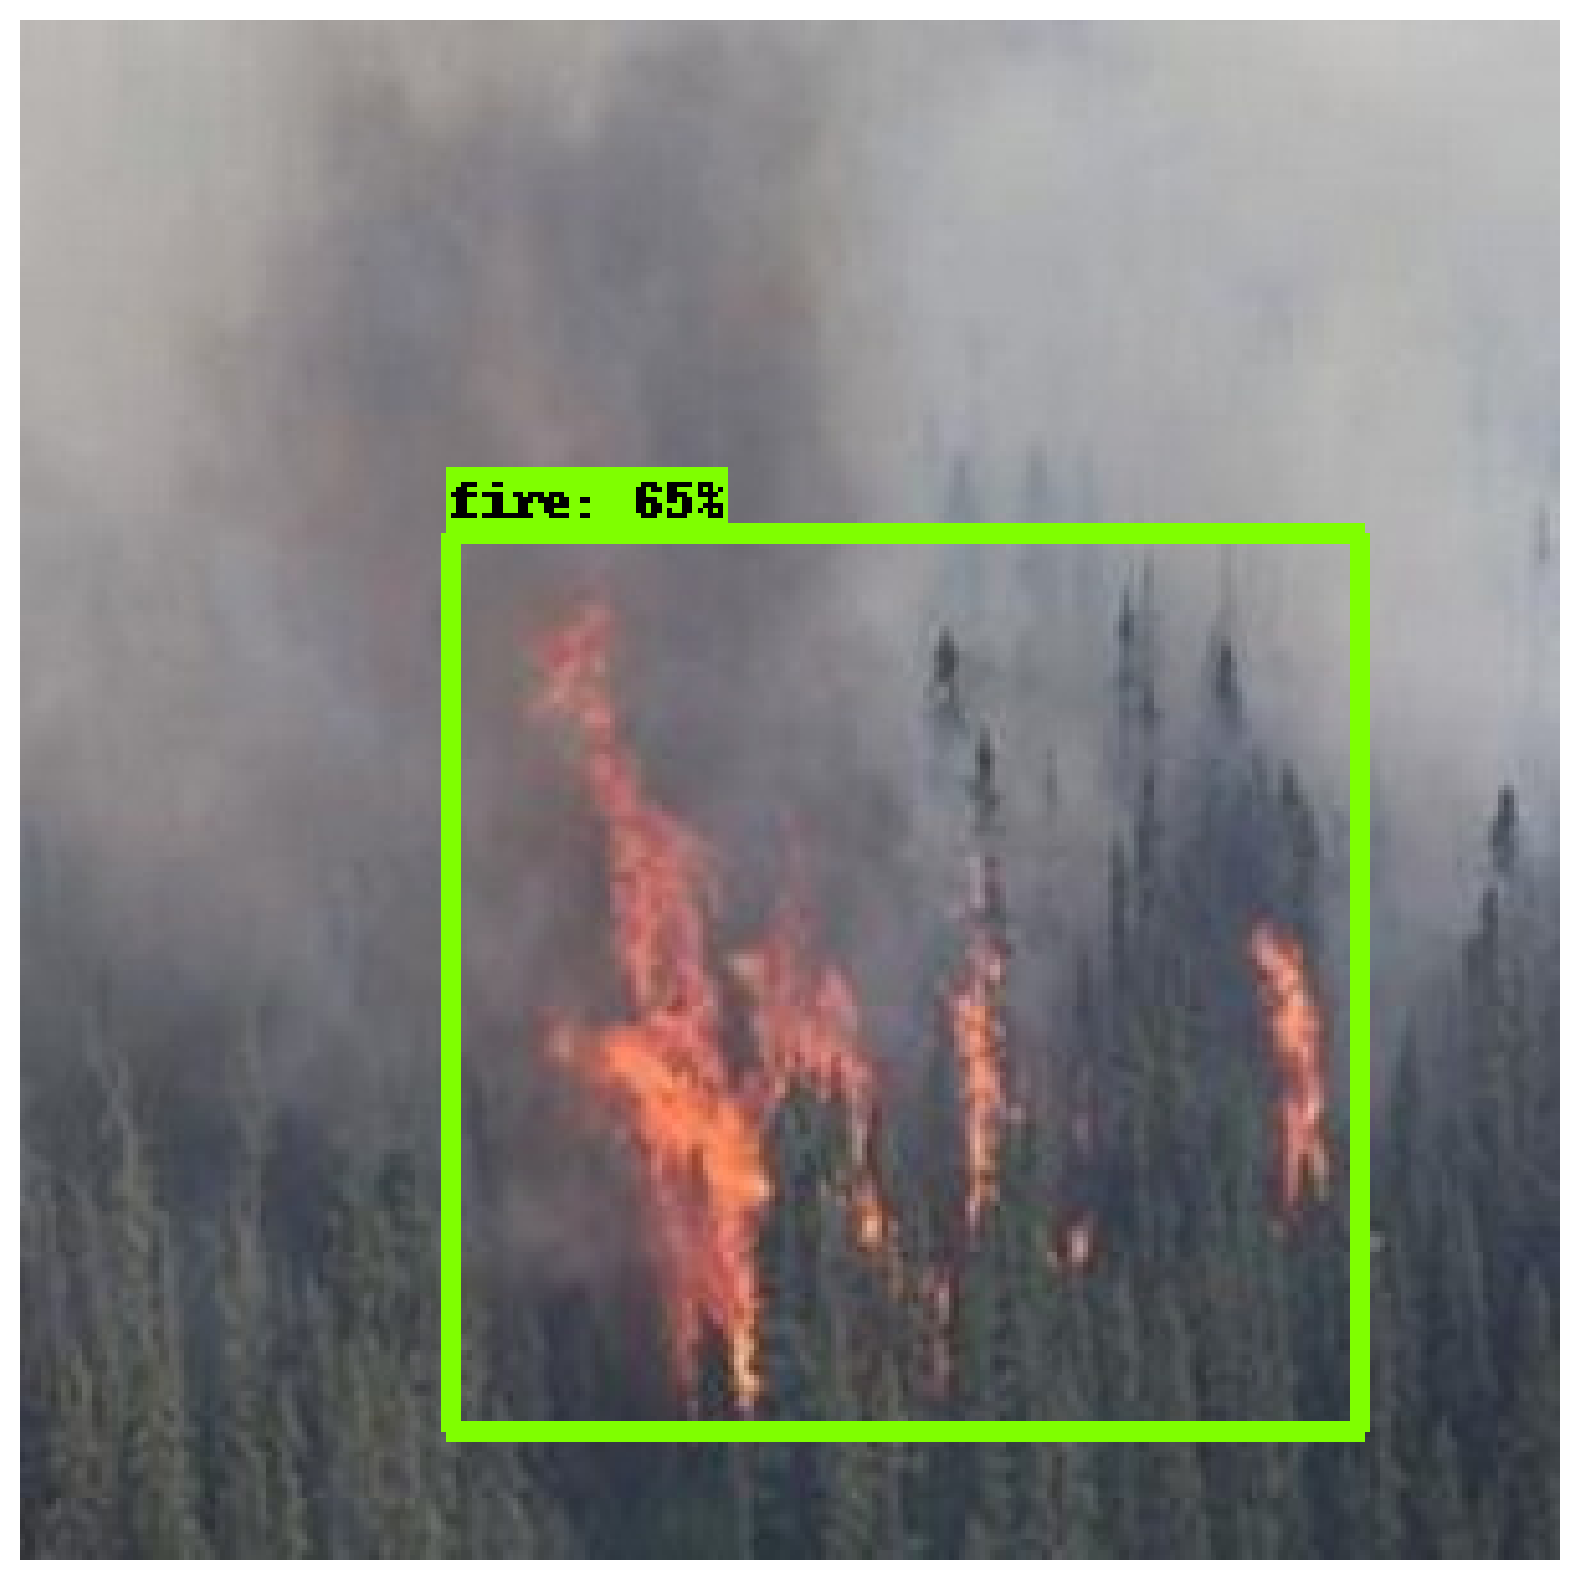

In [ ]:
displayDetections(image1DetectionsSsdMobileNet, image1Np)

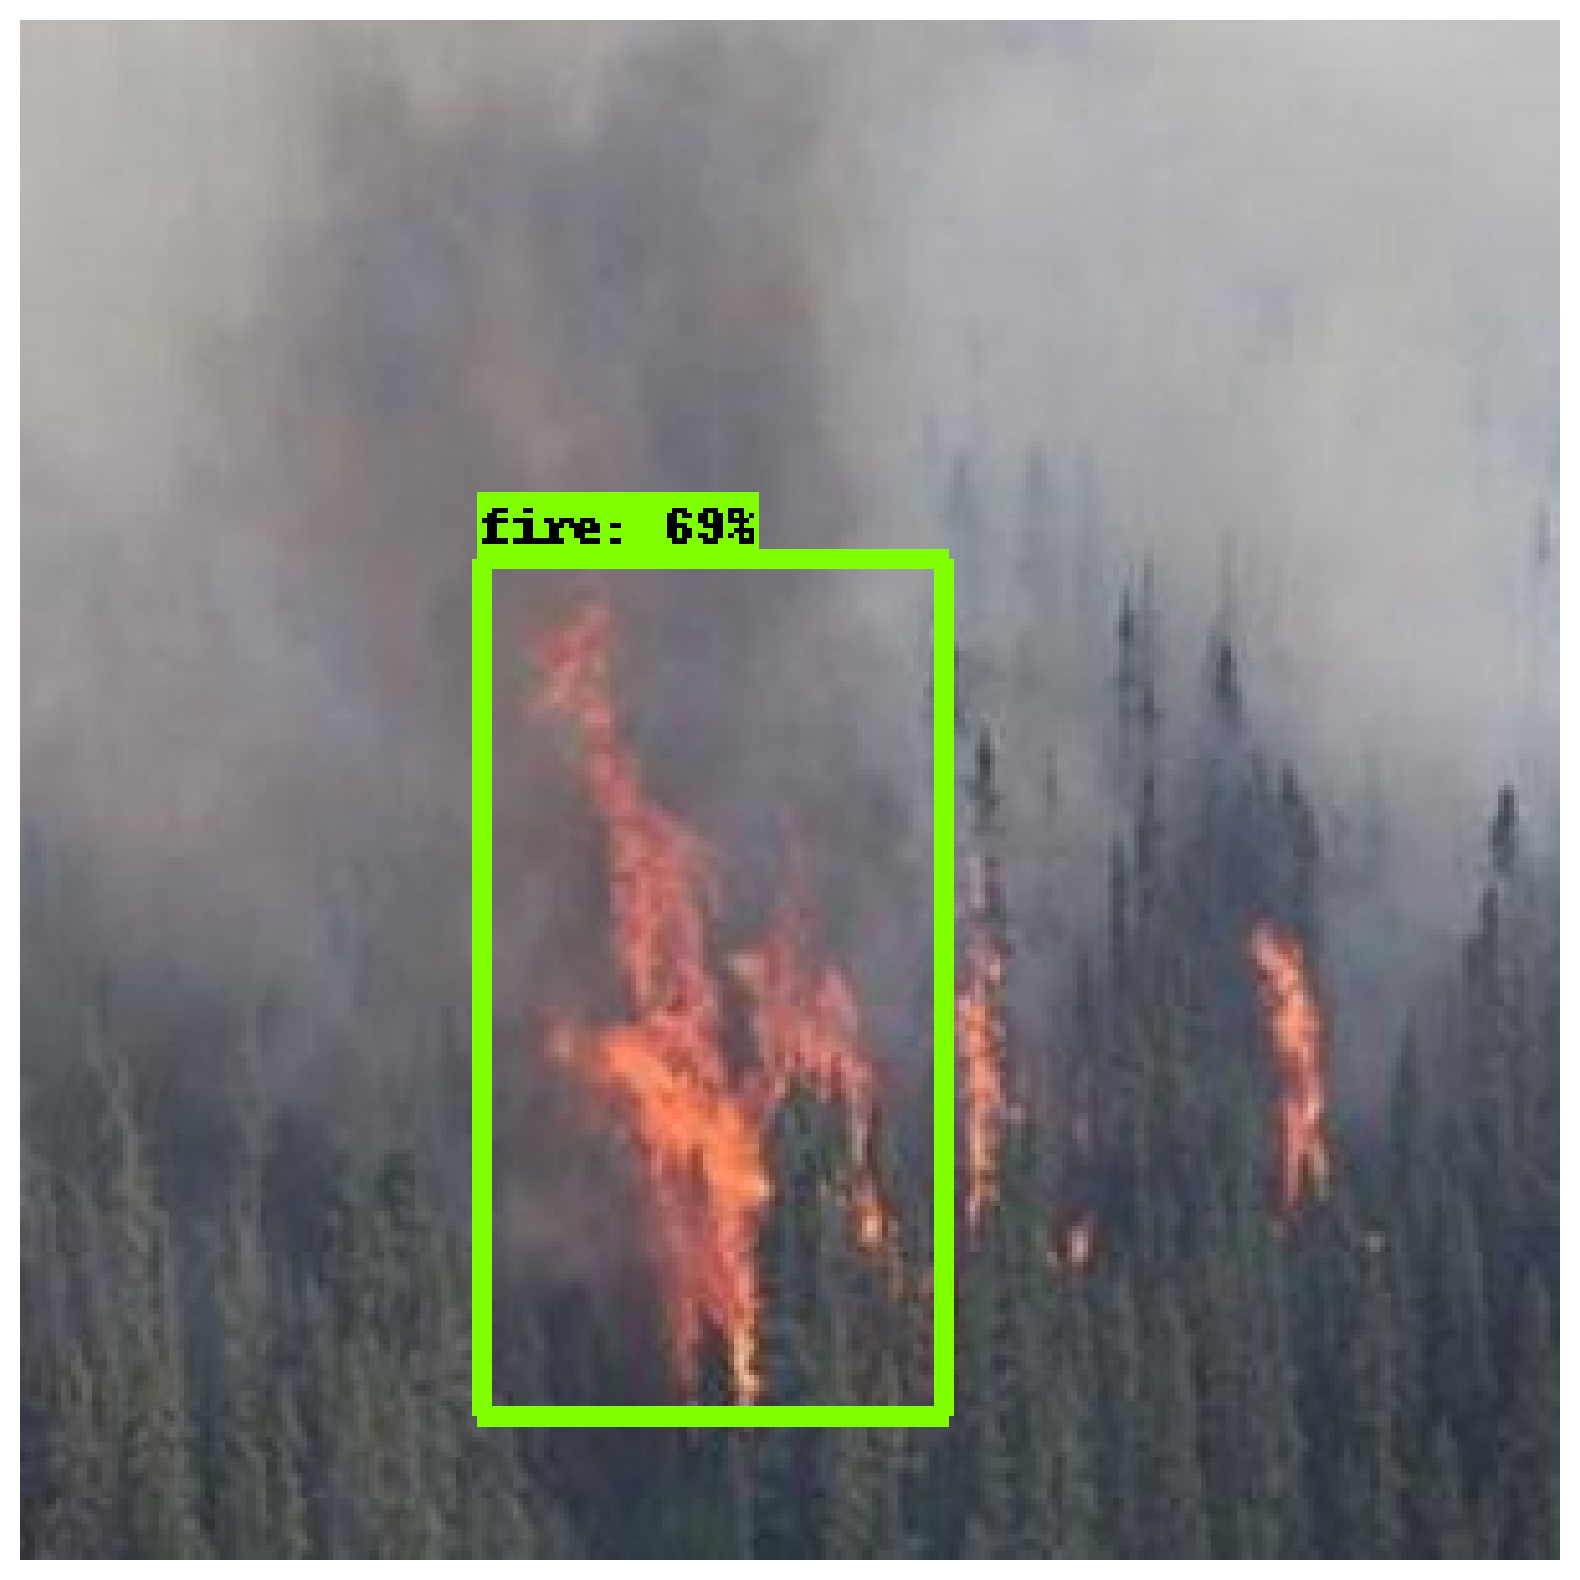

In [ ]:
displayDetections(image1DetectionsSsdMobileNetFpnLite, image1Np)

## Image 2

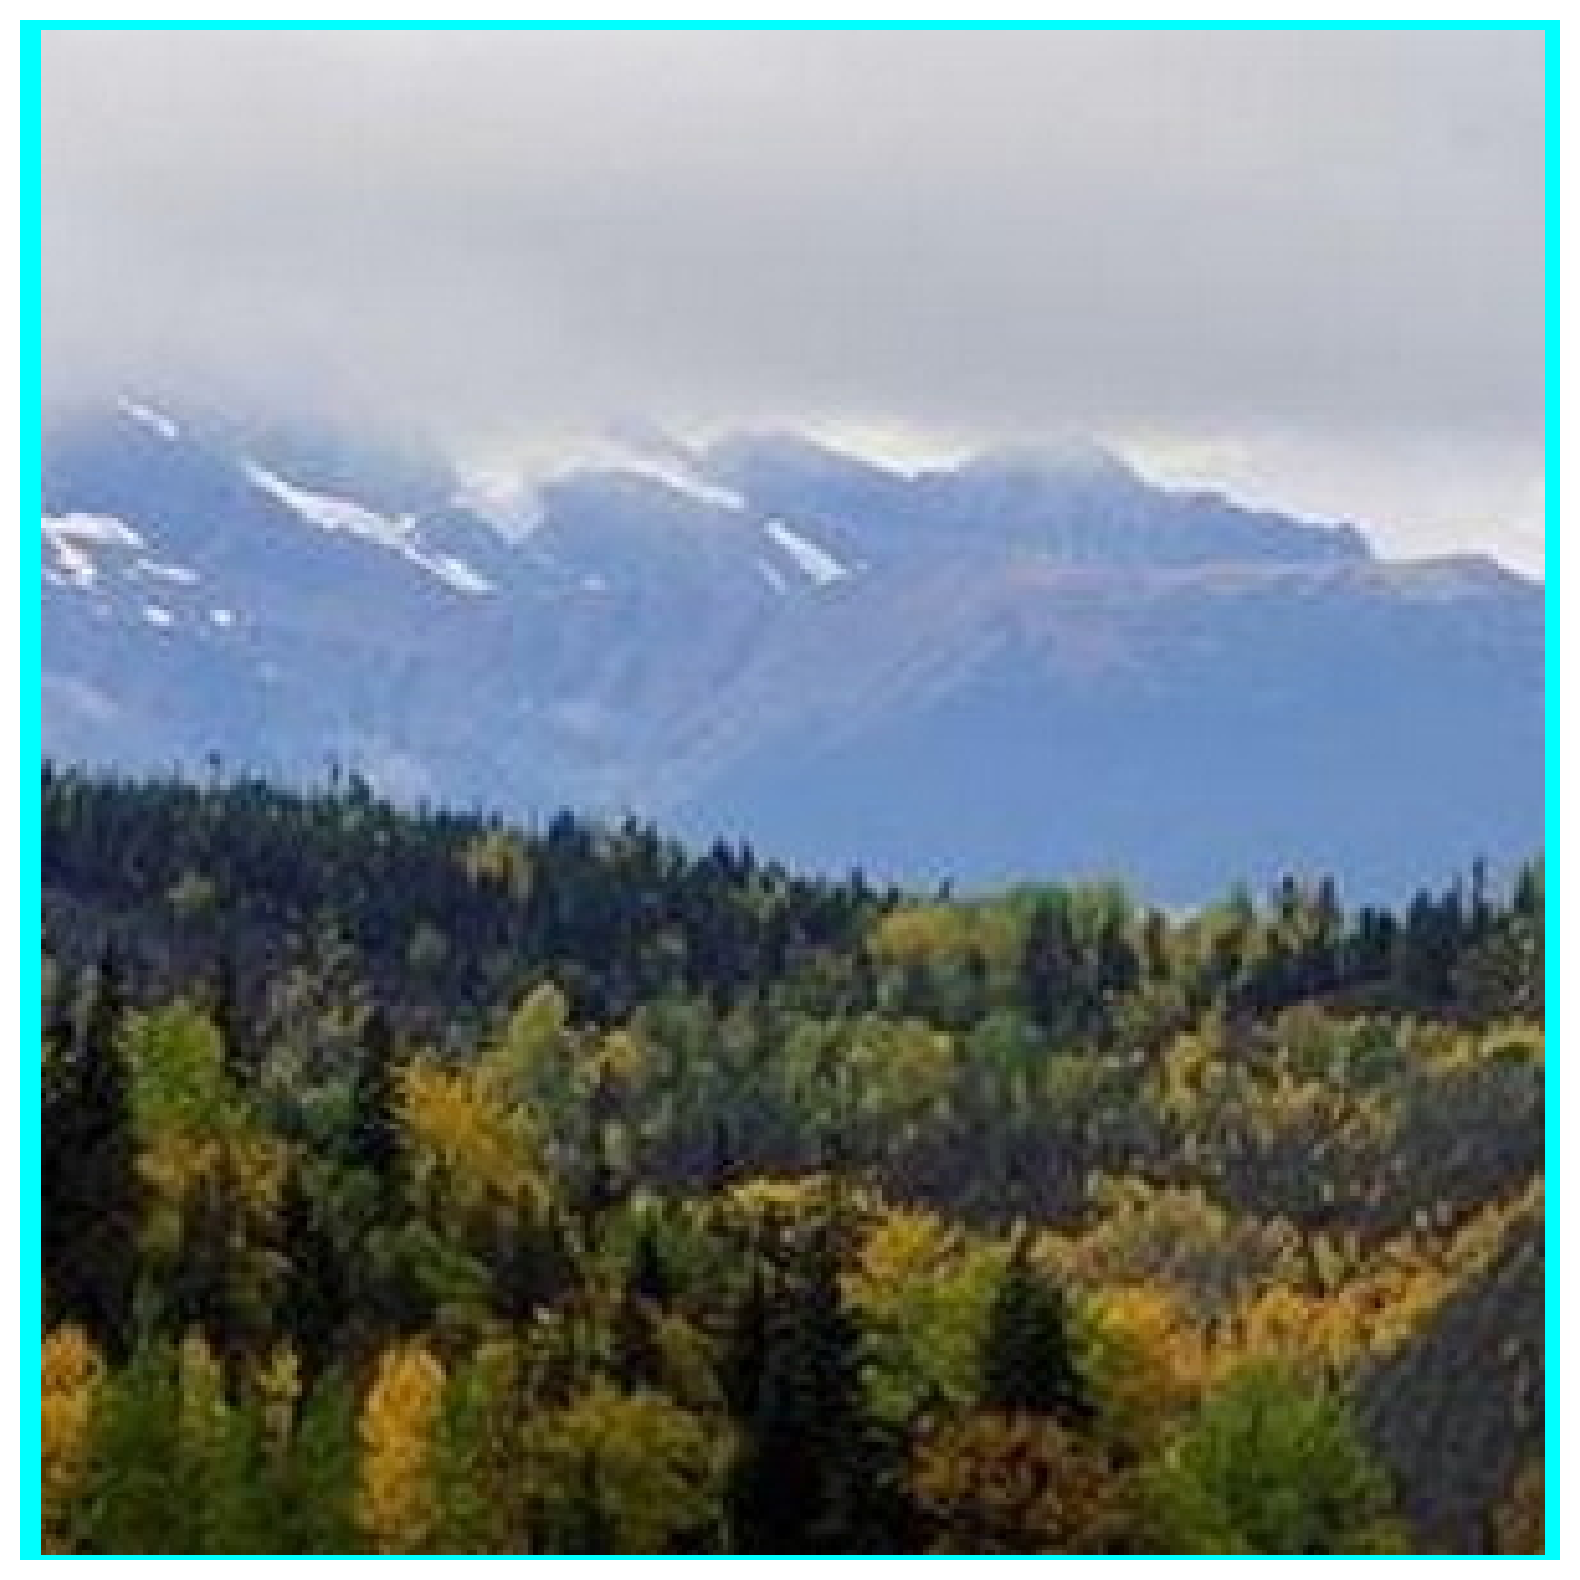

In [ ]:
displayDetections(image2DetectionsSsdMobileNet, image2Np)

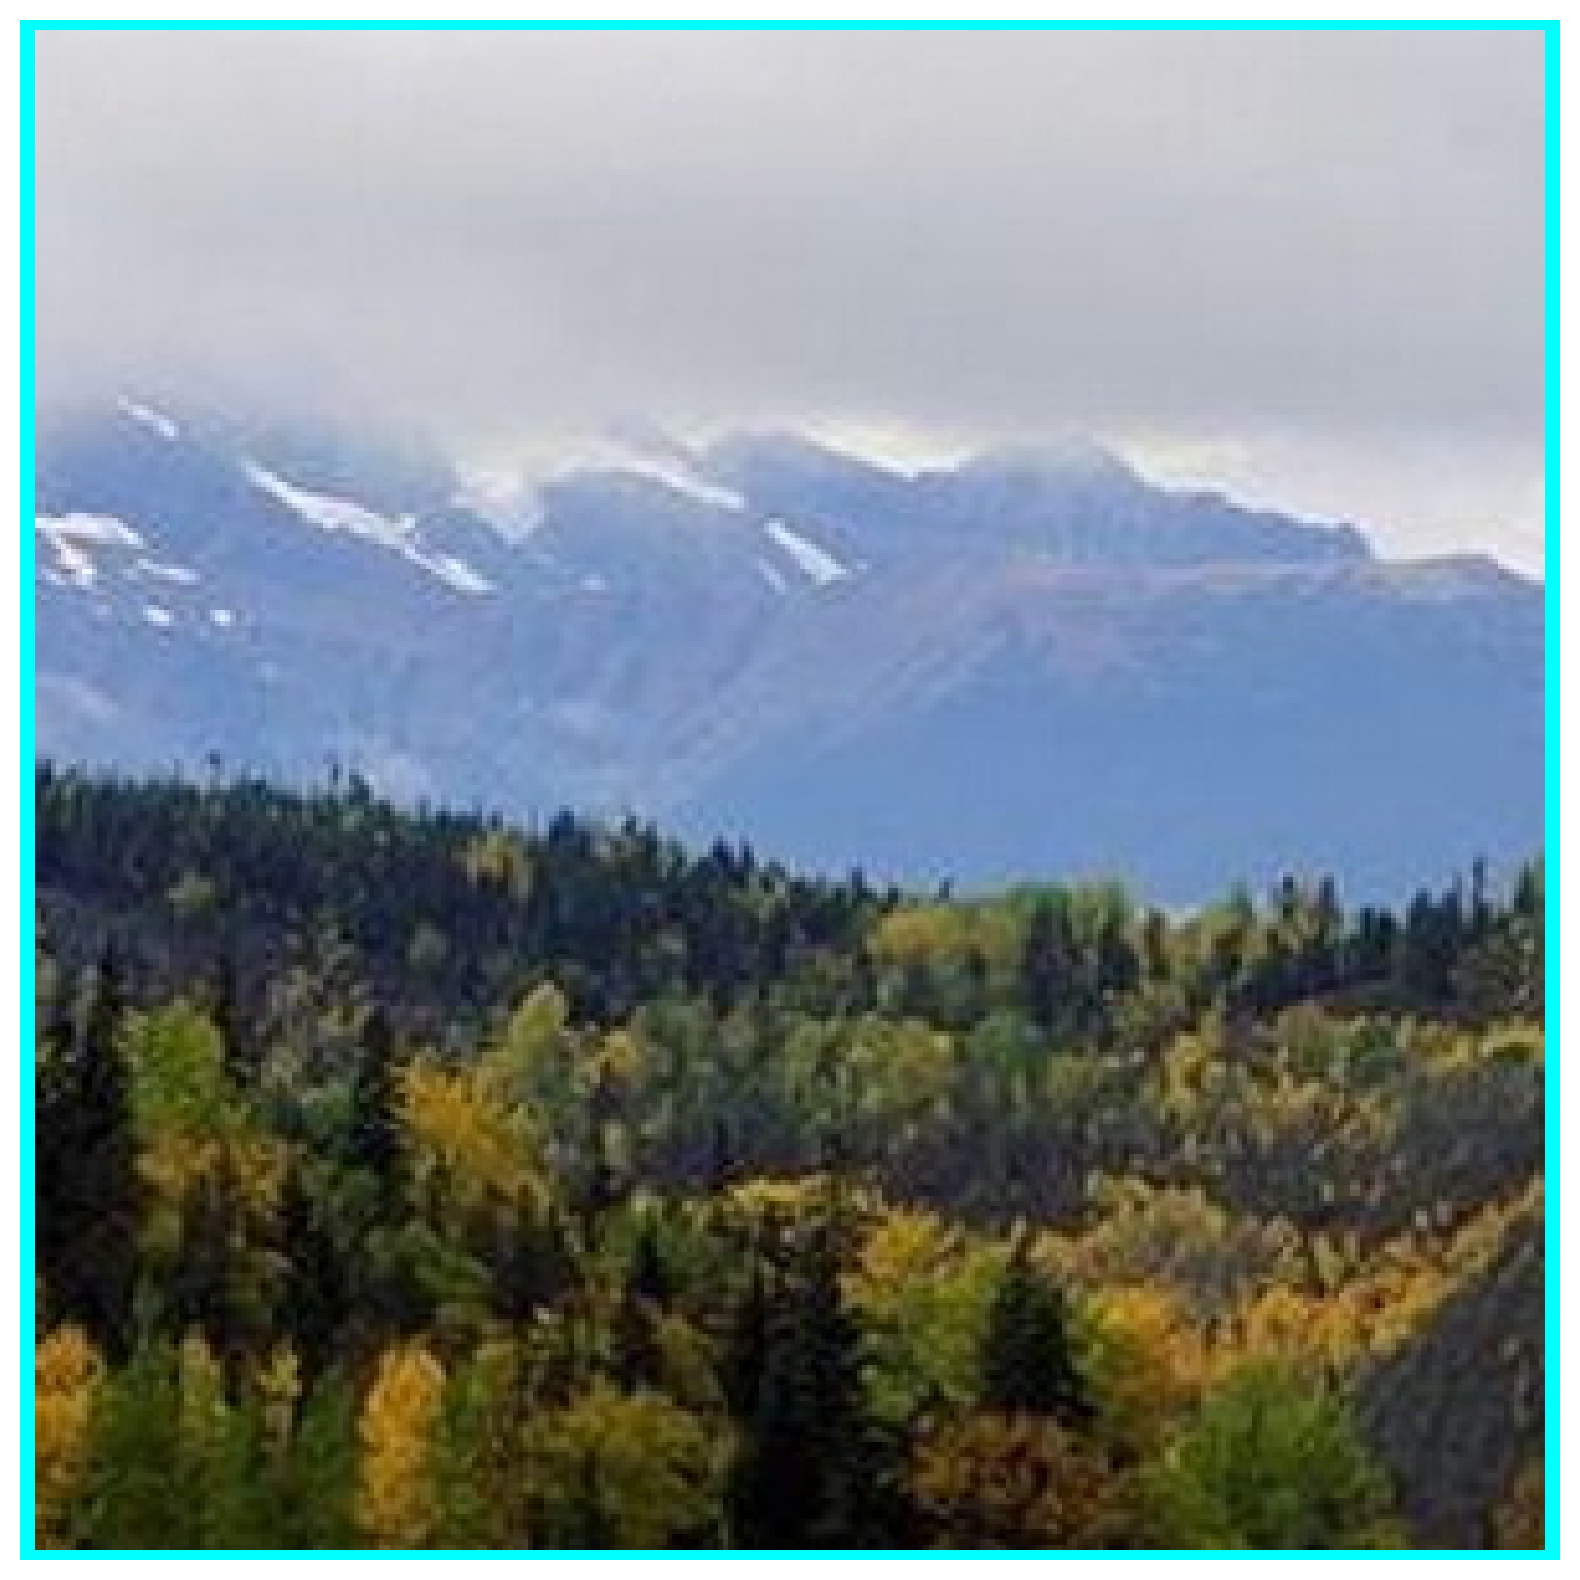

In [ ]:
displayDetections(image2DetectionsSsdMobileNetFpnLite, image2Np)

## Image 3

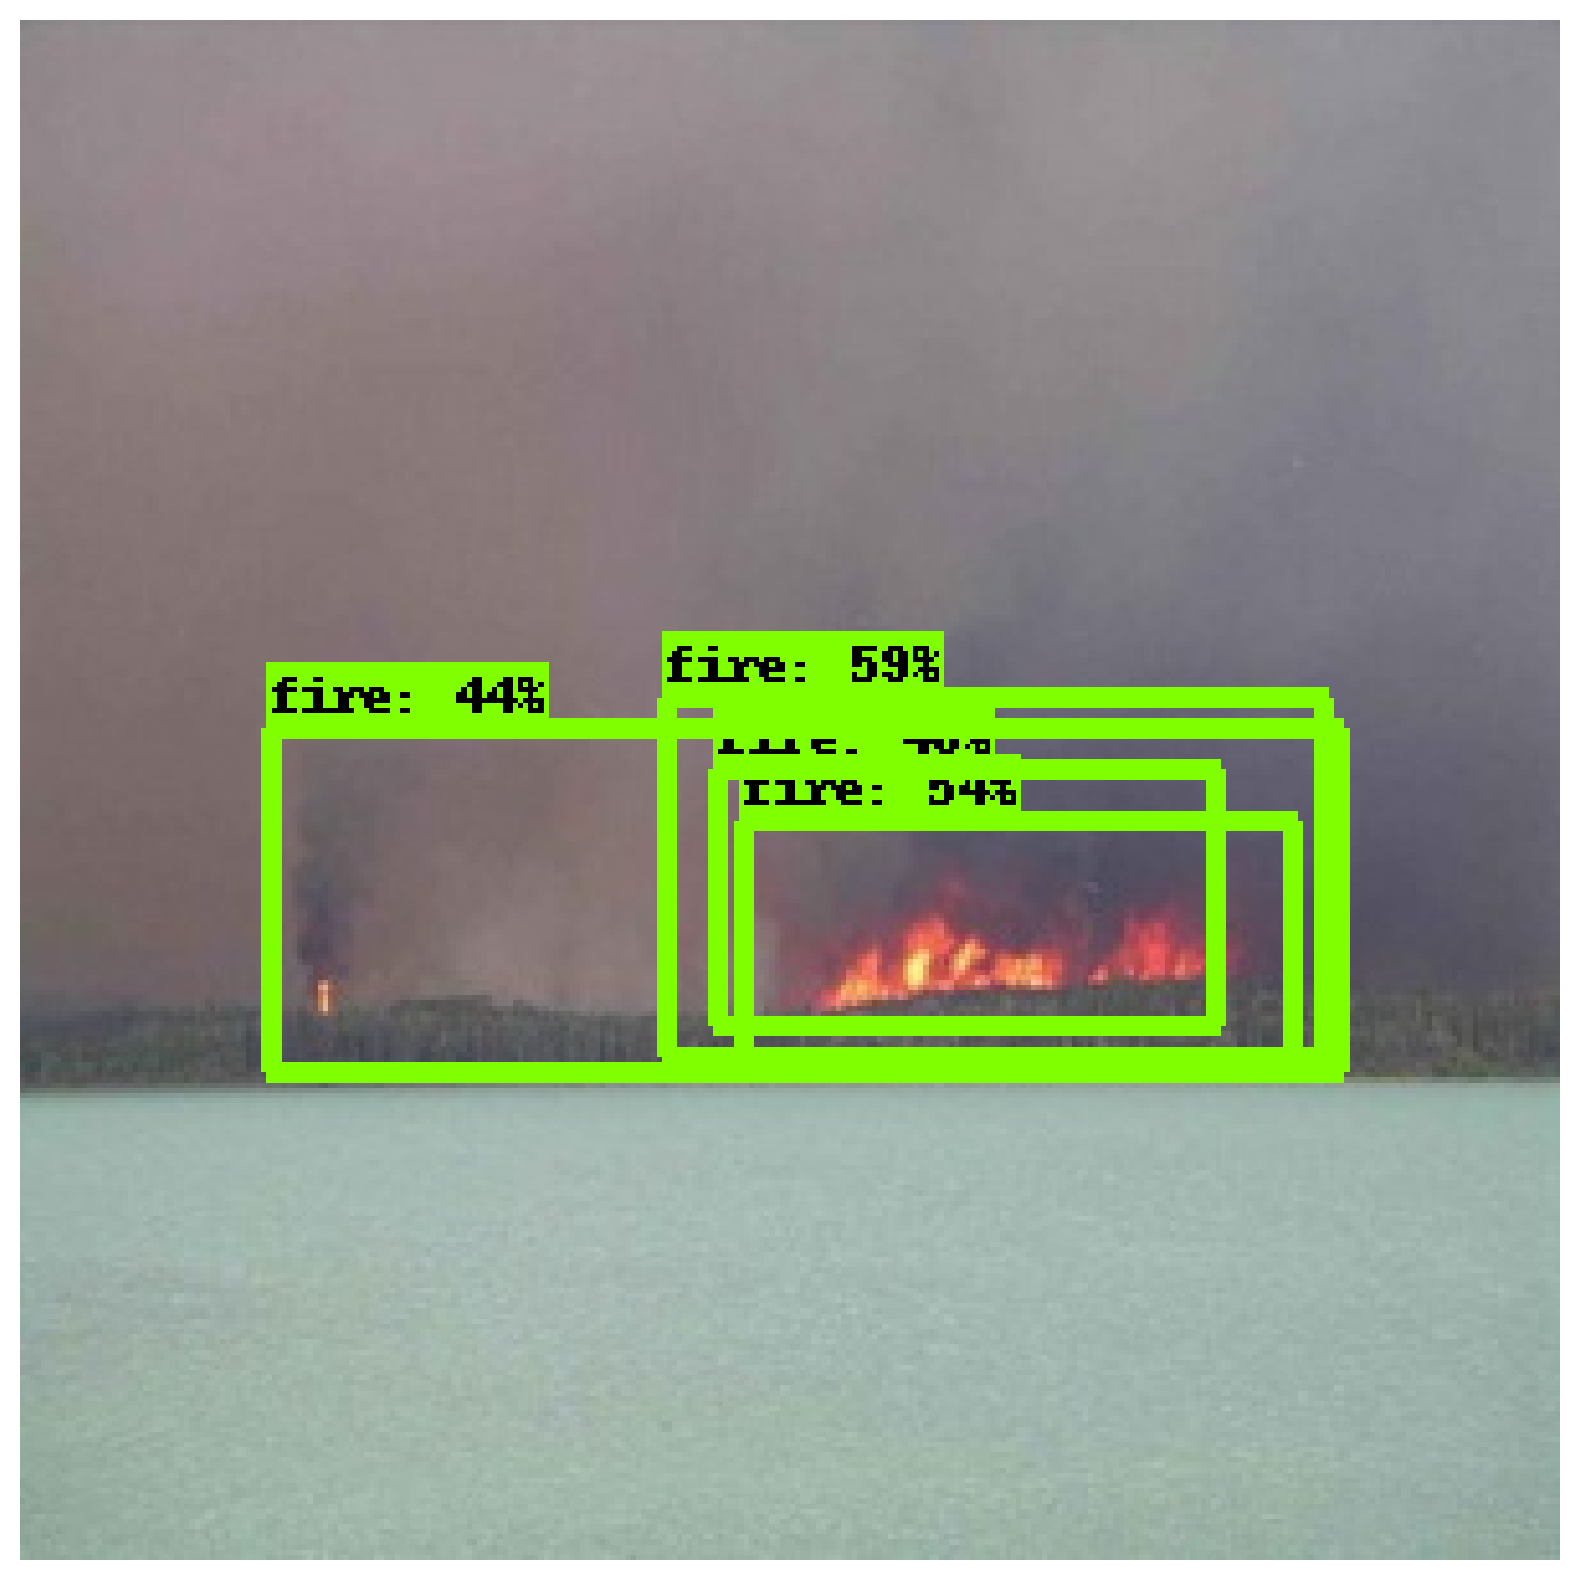

In [ ]:
displayDetections(image3DetectionsSsdMobileNet, image3Np)

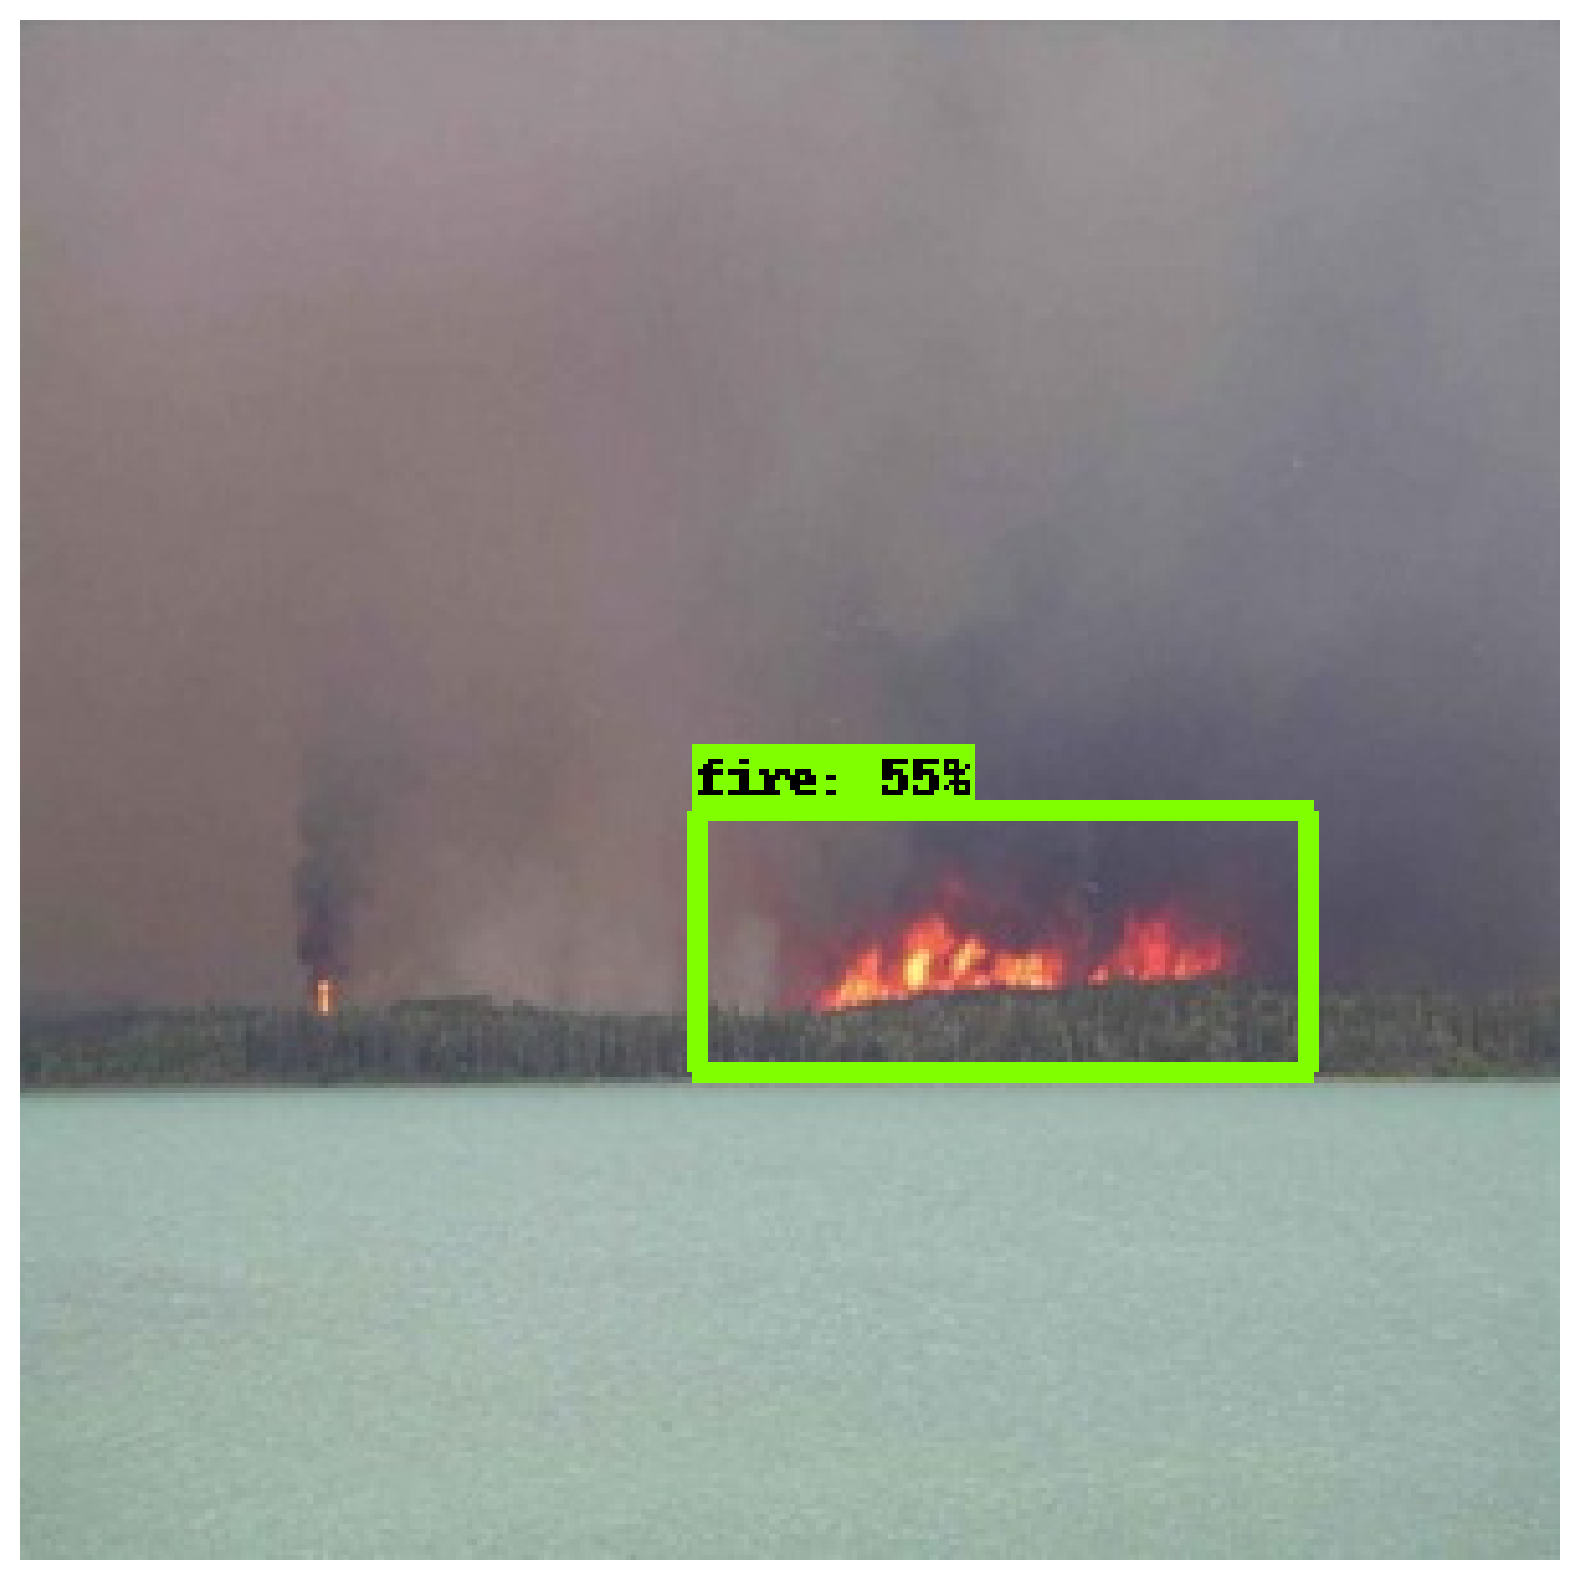

In [ ]:
displayDetections(image3DetectionsSsdMobileNetFpnLite, image3Np)

## Image 4

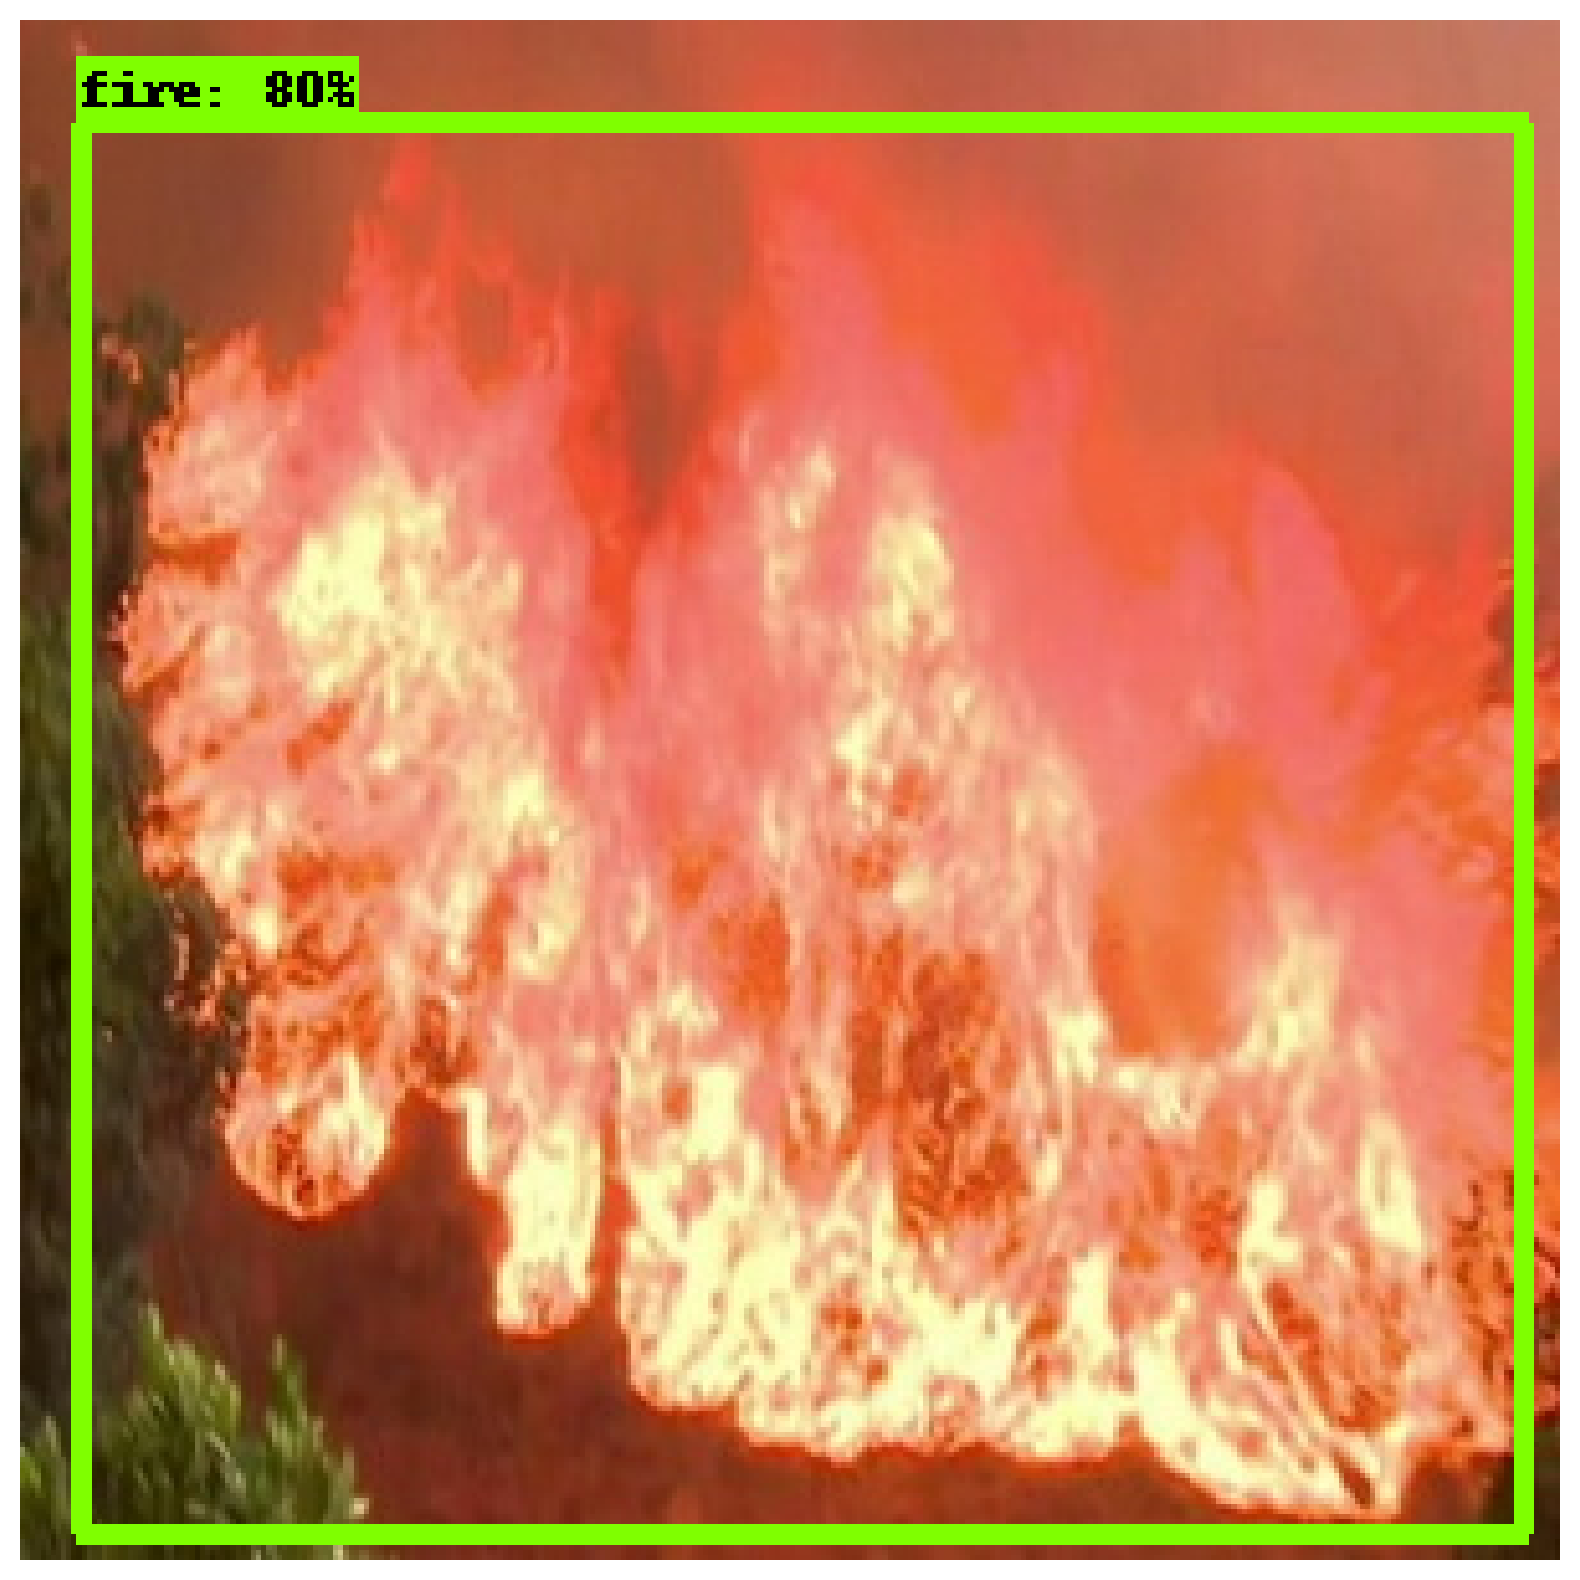

In [ ]:
displayDetections(image4DetectionsSsdMobileNet, image4Np)

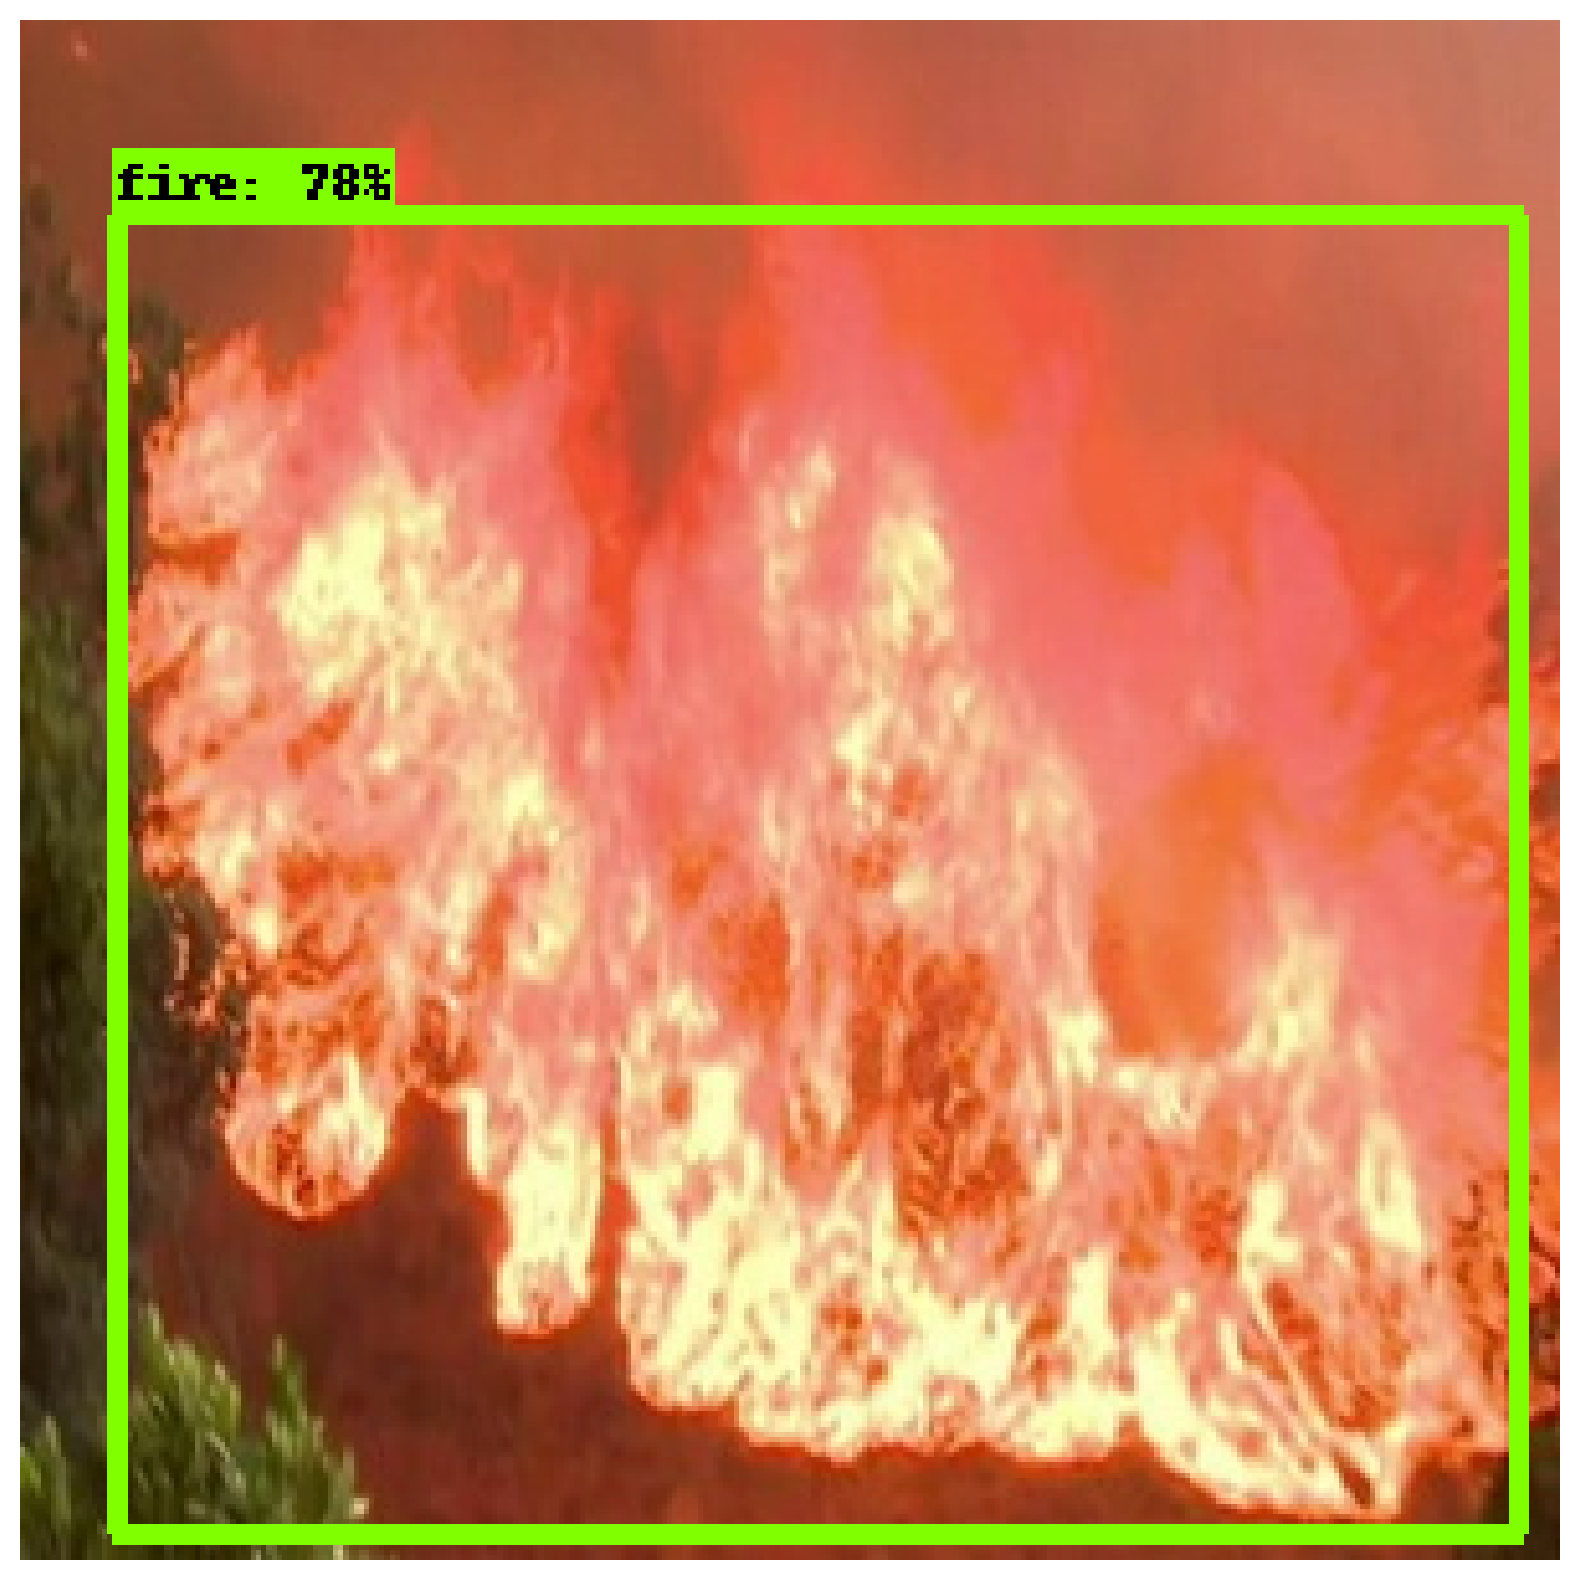

In [ ]:
displayDetections(image4DetectionsSsdMobileNetFpnLite, image4Np)